In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

(191, 621)


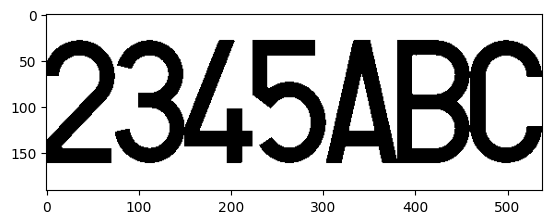

In [80]:
img = cv2.cvtColor(cv2.imread("example.jpg"), cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 100, 255, 0)
img = img[~np.all(img==255, axis=1)] #eliminatess white rows
img = img[:,~np.all(img==255, axis=0)] #eliminates black columns
print(img.shape)
plt.imshow(img[:,83:], cmap="gray")
plt.show()

(133, 540)


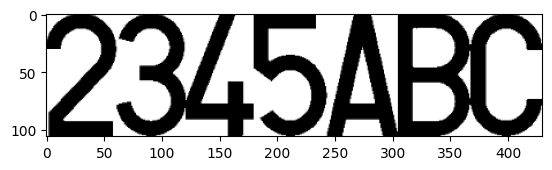

23454BC


In [129]:
img = cv2.cvtColor(cv2.imread("example.jpg"), cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 100, 255, 0)
plt.imshow(img, cmap="gray")
plt.show()
img = img[:,100:]
img = img[~np.all(img==255, axis=1)] #eliminatess white rows
img = img[:,~np.all(img==255, axis=0)] #eliminates black columns
img = cv2.resize(img, (int(106*img.shape[1]/img.shape[0]), 106))

plate = ""
directory = "Figures"
while img.shape[1] > 20:
    values = [np.inf, -1, "-"]
    for i, f in enumerate(os.listdir(directory)):
        t = cv2.cvtColor(cv2.imread(directory+"/"+f), cv2.COLOR_BGR2GRAY)
        _, t = cv2.threshold(t, 100, 255, 0)
        t = t[~np.all(t==255, axis=1)] #eliminatess white rows
        t = t[:,~np.all(t==255, axis=0)] #eliminates black columns
        extract = img[:t.shape[0],:t.shape[1]] - t[:img.shape[0],:img.shape[1]]
        if extract.sum() < values[0]:
            values = [extract.sum(), t.shape[1], f[0]]
    img = img[:,values[1]:]
    plate = plate + values[2]
print(plate)

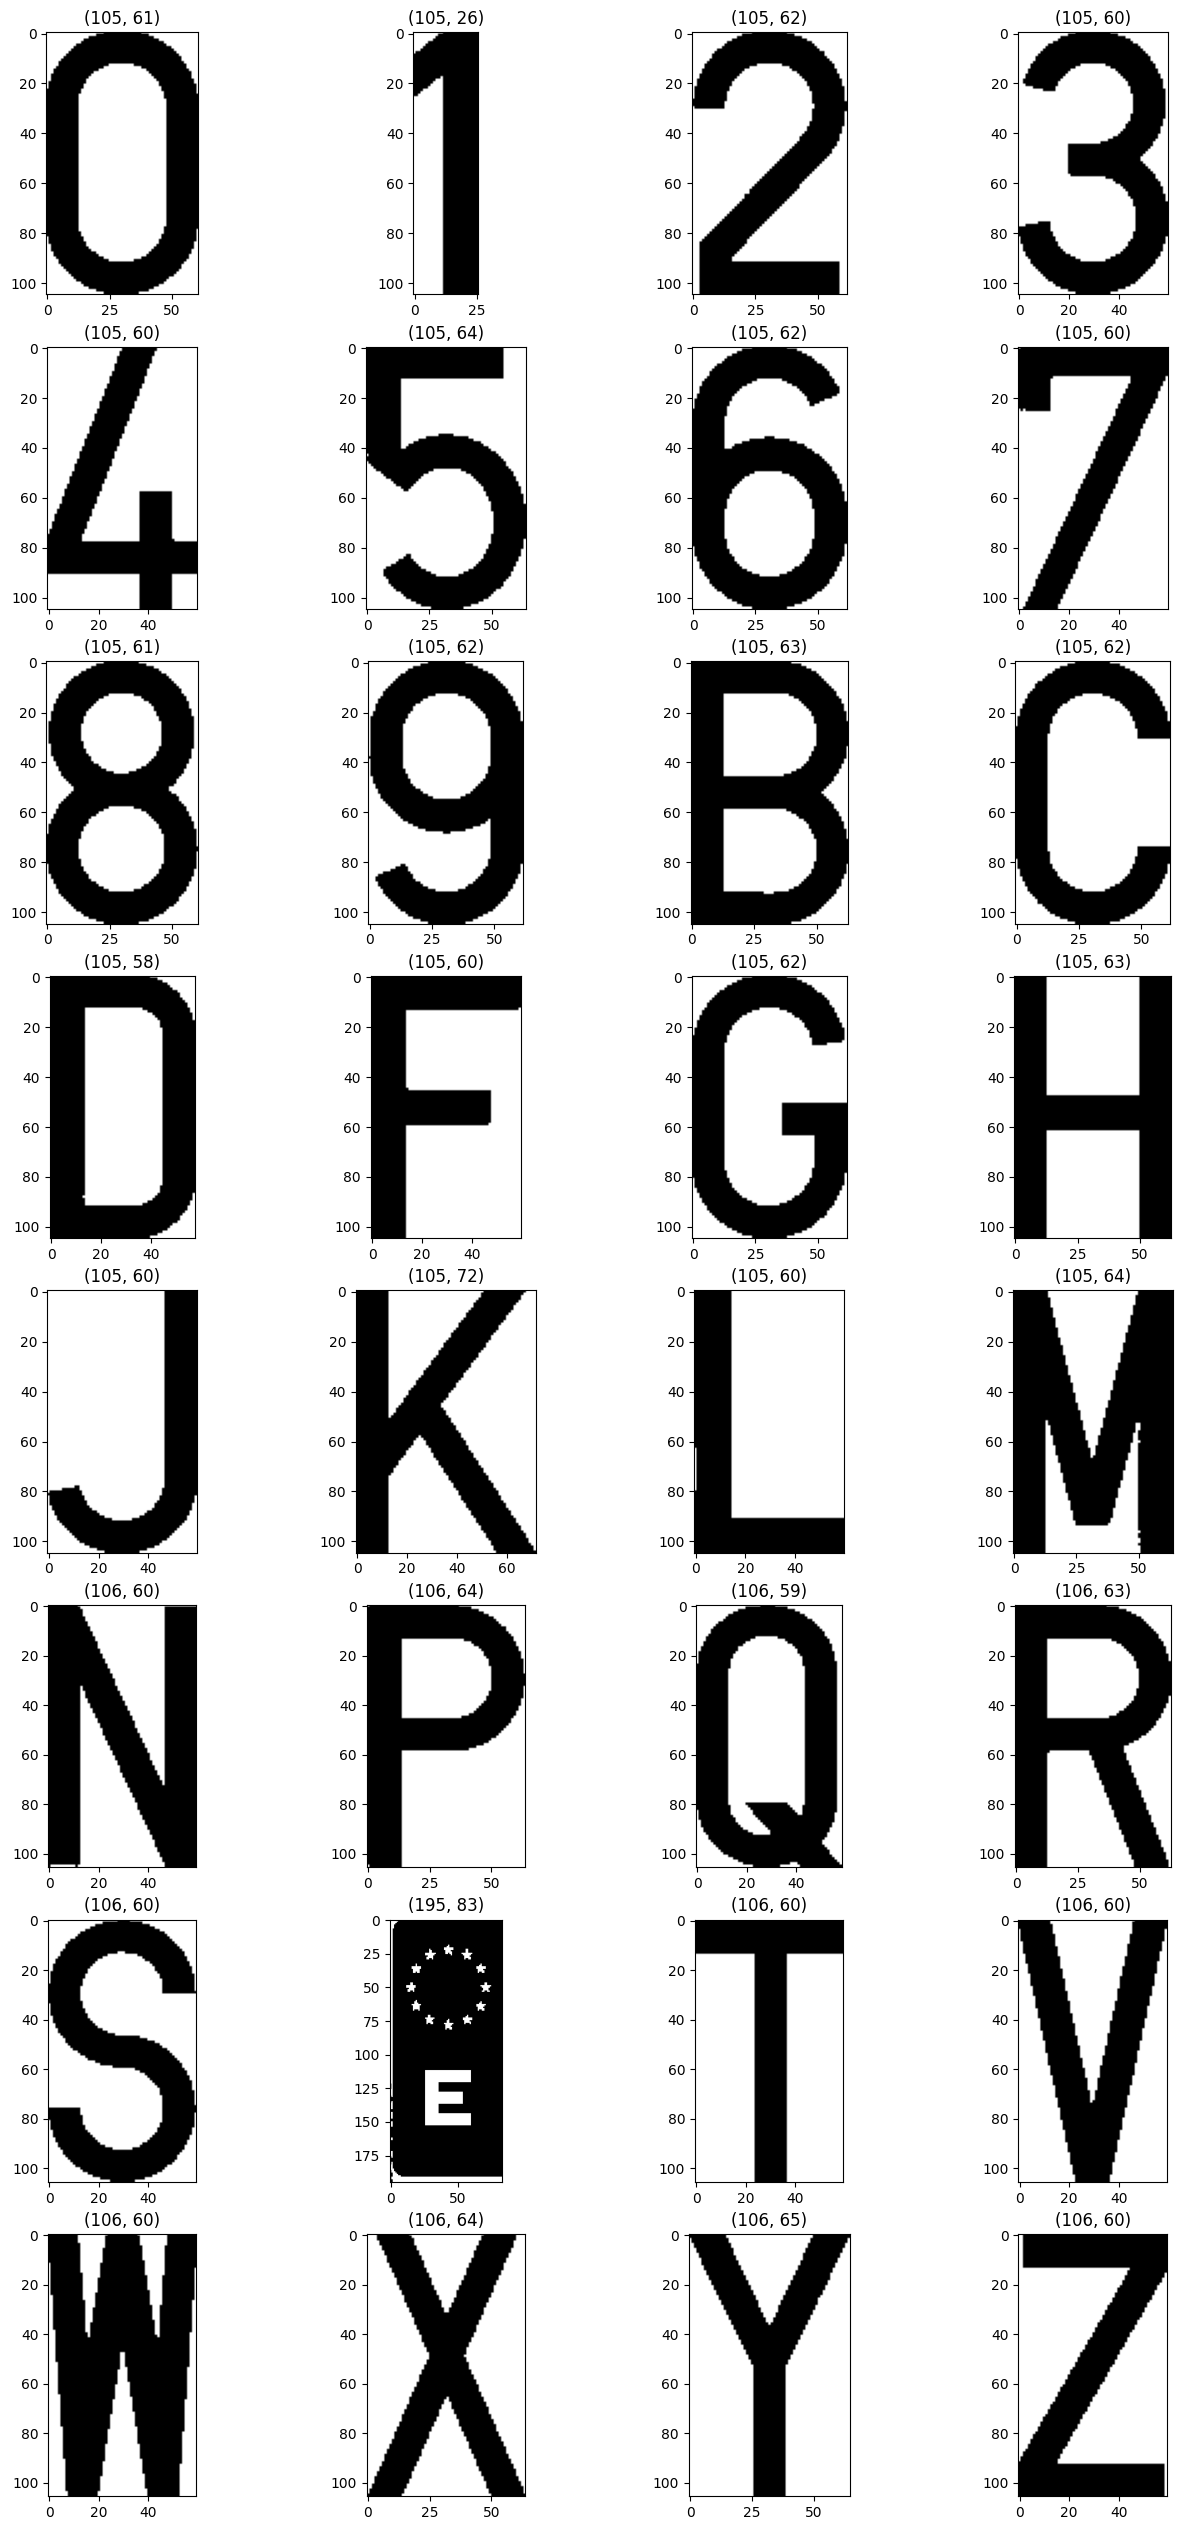

In [117]:
directory = "Figures"

fig, ax = plt.subplots(8, 4, figsize=(16,32))
for i, f in enumerate(os.listdir(directory)):
    img = cv2.cvtColor(cv2.imread(directory+"/"+f), cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 100, 255, 0)
    img = img[~np.all(img==255, axis=1)] #eliminatess white rows
    img = img[:,~np.all(img==255, axis=0)] #eliminates black columns
    ax[i//4, i%4].imshow(img, cmap="gray")
    ax[i//4, i%4].set_title(str(img.shape))